# <span style='color:blue '> Image classification using Convolutional neural network </span>

# Source: https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 is the labeled subset of the 80 million tiny images dataset.
They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes with 6000 images per class. 
There are 50000 training images and 10000 test images.



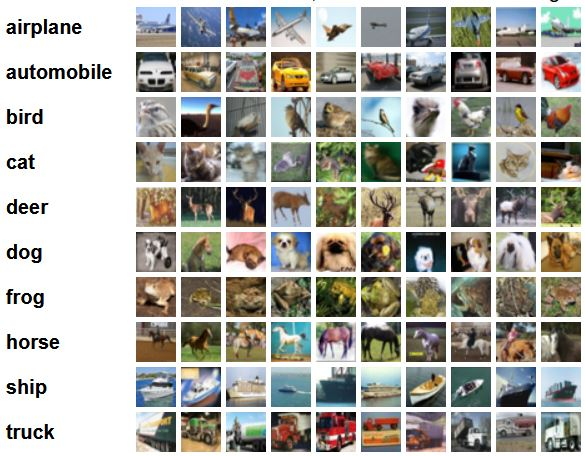








Import packages

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

Load the cifar10 data

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

Training data

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Remove extra brackets (Converting 2D array tom 1D array)

In [5]:
y_train=y_train.reshape(-1,)

In [6]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Test data

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test=y_test.reshape(-1,)

In [9]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [10]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plot the samples

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize=(4,4))
    plt.imshow(X[index])
    plt.title(classes[y[index]])

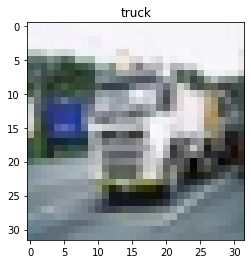

In [13]:
plot_sample(X_train,y_train,1000)

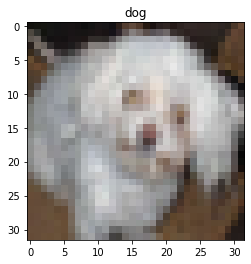

In [14]:
plot_sample(X_test,y_test,1000)

In [15]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [16]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

Normalizing the training and test data to 0-1 range

In [17]:
X_train=X_train/255.0
X_test=X_test/255.0

In [18]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

Build simple neural network for image classification

Input nodes:3072

Hidden layer 1: 3000 nodes, relu activation

Hidden layer 2: 1000 nodes, relu activation

Output nodes:10, sigmoid activation

In [19]:
nn=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

Compile

In [20]:
nn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fit the training data

In [21]:
nn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8556 - accuracy: 0.3369
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6547 - accuracy: 0.4158
Epoch 3/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5690 - accuracy: 0.4457
Epoch 4/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5054 - accuracy: 0.4676
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4542 - accuracy: 0.4872


Accuracy in classification using simple neural network is 48.61.

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=nn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification report: \n",classification_report(y_test,y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.52      0.55      1000
           1       0.71      0.42      0.53      1000
           2       0.35      0.42      0.38      1000
           3       0.28      0.60      0.39      1000
           4       0.57      0.23      0.33      1000
           5       0.64      0.12      0.19      1000
           6       0.53      0.51      0.52      1000
           7       0.53      0.56      0.55      1000
           8       0.65      0.58      0.61      1000
           9       0.43      0.74      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.53      0.47      0.46     10000
weighted avg       0.53      0.47      0.46     10000



Lets build a CNN and see the change in model performance

In [23]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

Compile

In [24]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fit the training data

In [25]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4511 - accuracy: 0.4797
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1027 - accuracy: 0.6158
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9756 - accuracy: 0.6603
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8892 - accuracy: 0.6897
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8272 - accuracy: 0.7112
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7676 - accuracy: 0.7316
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7195 - accuracy: 0.7489
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6796 - accuracy: 0.7615
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6418 - accuracy: 0.7765
Epoch 10/10
1563/1563 [==============================] - 20s 12m

Classification accuracy at 5 epochs using CNN=70.67%

Advantages of CNN over ANN in image classification:

Fast: Maxpooling reduces the dimension of the image.

Imporvement in performance in terms of accuracy.

Lets predict the values for images in the test set using CNN model

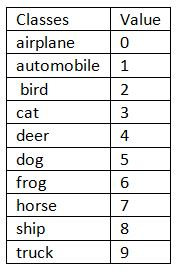

In [26]:
y_pred_c=cnn.predict(X_test)

In [27]:
y_pred_c_classes=[np.argmax(element) for element in y_pred_c]

In [28]:
y_pred_c_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [29]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

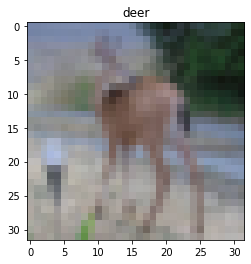

In [30]:
plot_sample(X_test,y_test,100)

In [31]:
y_pred_c_classes[100]

4

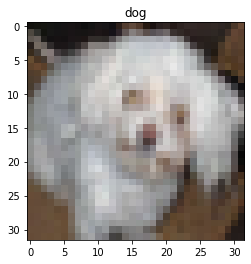

In [32]:
plot_sample(X_test,y_test,1000)

In [33]:
y_pred_c_classes[1000]

5

In [34]:
classes[y_pred_c_classes[1000]]

'dog'